<a href="https://colab.research.google.com/github/pudgewithmom/python-basics/blob/main/IMinuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMinuit

Minuit - программа численной минимизации функций многих переменных, широко применяемая в физике элементарных частиц. Есть два питонских интерфейса, PyMinuit и IMinuit (он особенно удобен в ipython).

* iminuit — это интерфейс Python для пакета MINUIT2 C++ ( стандартный инструмент в CERN ) .
* Сводит к минимуму многовариантную функцию с дополнительными ограничениями поля
* Анализ неопределенностей : вычисляет ковариационную матрицу или контур правдоподобия профиля.

In [2]:
!pip install iminuit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.3 MB/s 


In [3]:
from iminuit import Minuit
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Простой пример

Определим квадратичную функцию от двух параметров.

In [ ]:
def f(a,b):
    return 10*a**2+10*b**2-16*a*b+12*a-24*b

In [ ]:
from iminuit import Minuit, describe
describe(f)

['a', 'b']

Создадим объект класса `Minuit`. `a` и `b` - грубые догадки, около чего надо искать минимум; `error_a` и `error_b` - оценки точности этих догадок (в начале минимизации программа будет делать шаги порядка этих величин, потом они будут уменьшаться). Пределы изменения задавать не обязательно. Валичина `errordef` показывает, насколько функция должна быть выше своего минимума, чтобы это считалось отклонением на одну сигму; поскольку минимизируемая функция - это, как правило, $\chi^2$, значение 1 по умолчанию вполне годится.

In [ ]:
from iminuit import Minuit

m=Minuit(f, a=5, b=5)
# set step size with error_<name>=... keyword
#m=Minuit(f, a=5, b=5, error_a=0.1, error_b=0.1)
#m=Minuit(f,a=0,error_a=1,limit_a=(-10, 10), b=0,error_b=1,limit_b=(-10, 10))

Наиболее популярный метод минимизации - `migrad`.

In [ ]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 31               │
│ EDM = 1.25e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

Значения параметров.

In [ ]:
m.values

<ValueView a=1.0000000000433014 b=2.0000000000541194>

Значение функции в точке минимума.

In [ ]:
m.fval

-17.999999999999996

Ошибки параметров.

In [ ]:
m.errors

<ErrorView a=0.5270462767576469 b=0.5270462771827125>

In [ ]:
# calling hesse explicitly
#явный вызов Гессе
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 51               │
│ EDM = 1.09e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

Если, скажем, $a$ - наш окончательный физический результат, то мы напишем в статье $a=1\pm0.5$. На самом деле у нас есть больше информации, поскольку ошибки $a$ и $b$ сильно скоррелированы. Матрица корреляции ошибок:

100% (3 of 3) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2735e50350>,
       dtype=object))

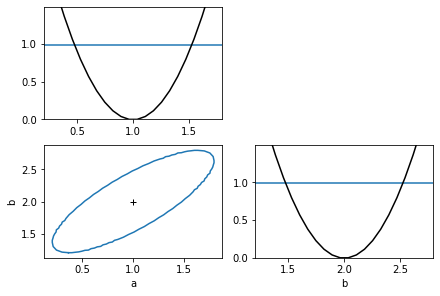

In [ ]:
m.draw_mnmatrix()


Минимизация квадратичной формы сводится к решению системы линейных уравнений, а матрица корреляции ошибок - обратная матрица этой системы. В таком простом случае не имеет смысла использовать инструмент минимизации произвольных функций, такой, как Minuit.

In [ ]:
M=array([[10.,-8.],[-8.,10.]])
M=inv(M)
M

array([[0.27777778, 0.22222222],
       [0.22222222, 0.27777778]])

In [ ]:
M@array([[-6],[12]])

array([[1.],
       [2.]])

Нарисуем контуры, соответствующие отклонению на 1, 2 и 3 сигмы от оптимальной точки.

In [ ]:
m.draw_mncontour('a','b',nsigma=3)

TypeError: ignored

То же в виде цветов.

In [ ]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

AttributeError: ignored

## Дайте мне 3 параметра, и я профитирую слона. С 4 параметрами он будет махать хоботом.

Пусть у нас есть экспериментальные данные, и мы хотим профитировать их прямой.

In [ ]:
def fit(a,b,x):
    return a*x+b

Данные не настоящие, а сгенерированные. Все имеют ошибки 0.1.

In [ ]:
x=linspace(0,1,11)
dy=0.1*ones(11)
y=x+dy*normal(size=11)

Функция $\chi^2$.

In [ ]:
def chi2(a,b):
    global x,y,dy
    return (((y-fit(a,b,x))/dy)**2).sum()

Минимизируем.

In [ ]:
m=Minuit(chi2,a=0,b=0,error_a=1,error_b=1)

In [ ]:
m.migrad()

In [ ]:
m.values

In [ ]:
m.fval

In [ ]:
m.matrix()

In [ ]:
m.draw_mncontour('a','b',nsigma=3)

In [ ]:
a,b,g,r=m.mncontour_grid('a','b',nsigma=3)
pcolormesh(a,b,g)
colorbar()

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

In [ ]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(0,1,101)
plot(xt,fit(m.values['a'],m.values['b'],xt),'b-')
plot(xt,fit(1,0,xt),'g--')

Когда фитирующая функция есть линейная комбинация каких-то фиксированных функций с неизвестными коэффициентами, минимизация $\chi^2$ сводится к решению системы линейных уравнений. Нет надобности использовать Minuit.

## Резонанс без фона

Пусть теперь наша фитирующая функция - Брейт-Вигнеровский резонанс (без фона), с двумя параметрами - положением и шириной (лучше бы ввести третий - высоту, но я не стал этого делать для простоты). Теперь $\chi^2$ - сложная нелинейная функция параметров.

In [ ]:
def fit(x0,Gamma,x):
    return 1/((x-x0)**2+Gamma**2)

Вот наши экспериментальные данные (с ошибками 0.1).

In [ ]:
x=linspace(-3,3,21)
dy=0.1*ones(21)
y=fit(0,1,x)+dy*normal(size=21)

Минимизируем $\chi^2$.

In [ ]:
def chi2(x0,Gamma):
    global x,y,dy
    return (((y-fit(x0,Gamma,x))/dy)**2).sum()

In [ ]:
m=Minuit(chi2,x0=0,error_x0=1,Gamma=1,error_Gamma=1)

In [ ]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -18                        │              Nfcn = 825              │
│ EDM = 1.01e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    1.0    │    0.5    │            │            │         │         │       │
│ 1 │ b    │    2.0    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.278 0.222 │
│ b │ 0.222 0.278 │
└───┴─────────────┘

In [ ]:
m.values

<ValueView a=1.0000000000433014 b=2.0000000000541194>

In [ ]:
m.fval

-17.999999999999996

In [ ]:
m.errors

<ErrorView a=0.5270464487103346 b=0.5270465632194063>

In [ ]:
m.matrix()

AttributeError: ignored

In [ ]:
m.draw_mncontour('x0','Gamma',nsigma=3)

TypeError: ignored

In [ ]:
x0,Gamma,g,r=m.mncontour_grid('x0','Gamma',nsigma=3)
pcolormesh(x0,Gamma,g)
colorbar()

AttributeError: ignored

Теперь контуры постоянной высоты $\chi^2$ - уже не симметричные эллипсы с центром в оптимальной точке, а какие-то сложные кривые. Ошибки положения и ширины резонанса довольно-таки независимы.

Нарисуем на одном графике экспериментальные точки, наш фит (сплошная линия) и истинную теоретическую кривую (пунктир).

In [ ]:
errorbar(x,y,dy,fmt='ro')
xt=linspace(-3.5,3.5,101)
plot(xt,fit(m.values['x0'],m.values['Gamma'],xt),'b-')
plot(xt,fit(0,1,xt),'g--')

* Линейная модель имеет 2 параметра (x,y)

# Основы

In [31]:
# basic setup of the notebook
from matplotlib import pyplot as plt
import numpy as np

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

iminuit version: 2.17.0


## Быстрый старт

В этом первом разделе мы рассмотрим простой случай, когда линия должна быть подогнана к рассеяннымданные. Строка имеет два параметра. Мы проходим полную настройку, показывая все основные шаги, чтобы вы могли быстро приступить к работе. В следующих разделах мы рассмотрим шаги более подробно.

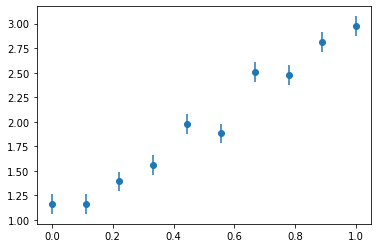

In [32]:
# our line model, unicode parameter names are supported :)
def line(x, α, β):
    return α + x * β


# generate random toy data with random offsets in y
np.random.seed(1)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # could also be an array
data_y = line(data_x, 1, 2) + data_yerr * np.random.randn(len(data_x))

# draw toy data
plt.errorbar(data_x, data_y, data_yerr, fmt="o");

Чтобы восстановить параметры α и β линейной модели из этих данных, нам нужно минимизировать подходящую функцию стоимости. Функция стоимости должна быть дважды дифференцируемой и иметь минимум при оптимальных параметрах. Здесь мы используем метод наименьших квадратов, функция стоимости которого вычисляет сумму квадратов остатков между моделью и данными. Задача iminuit — найти минимум этой функции. Давай сделаем это:

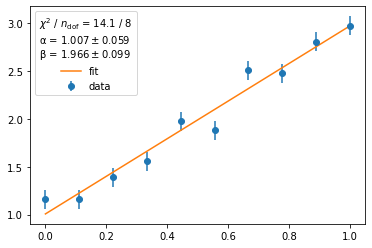

In [33]:
# iminuit contains a LeastSquares class to conveniently generate a least-squares cost function.
# We will revisit how to write this by hand in a later section.
least_squares = LeastSquares(data_x, data_y, data_yerr, line)

m = Minuit(least_squares, α=0, β=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties

# draw data and fitted line
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info));

И это все для базовой посадки.

Далее мы шаг за шагом углубимся в детали; как инициализируется объект Minuit, как запускать алгоритмы и как получать результаты.

iminuit был разработан, чтобы упростить включение таких функций, как least_squares(...), где параметры являются отдельными аргументами функции. Minuit поддерживает альтернативную сигнатуру функции, которая более удобна при изучении моделей с еще не определенным числом параметров, таких как многочлен. Здесь параметры передаются в виде массива numpy. Далее мы обсудим оба, но сосредоточимся на первом.

## Инициализировать объект Minuit

Чтобы минимизировать функцию, нужно создать экземпляр класса Minuit и передать функцию и начальное значение для каждого параметра. Это еще не начало минимизации, это произойдет позже.

Объект Minuitиспользует самоанализ для автоматического получения количества и имен параметров функции, чтобы их можно было инициализировать с помощью ключевых слов.

In [34]:
m = Minuit(least_squares, α=0, β=0)

Если мы забудем параметр или напечатаем его неправильно, Minuit выдаст ошибку.

In [35]:
try:
    Minuit(least_squares)
except:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-35-2975dab14c6b>", line 2, in <module>
    Minuit(least_squares)
  File "/usr/local/lib/python3.8/dist-packages/iminuit/minuit.py", line 605, in __init__
    raise RuntimeError(
RuntimeError: starting value(s) are required for α β


In [36]:
try:
    Minuit(least_squares, a=0, b=0)
except:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-36-a5081bb50cd5>", line 2, in <module>
    Minuit(least_squares, a=0, b=0)
  File "/usr/local/lib/python3.8/dist-packages/iminuit/minuit.py", line 625, in __init__
    self._init_state = _make_init_state(self._pos2var, start, kwds)
  File "/usr/local/lib/python3.8/dist-packages/iminuit/minuit.py", line 2452, in _make_init_state
    raise RuntimeError(
RuntimeError: a is not one of the parameters [α β]


### Начальные значения параметров

Основной алгоритм Minuit Migrad — локальный минимизатор. Он ищет локальный минимум, выполняя сочетание шагов Ньютона и градиентных спусков от начальной точки. Если ваша функция имеет несколько минимумов, найденный минимум будет зависеть от начальной точки. Даже если он имеет только один минимум, иминуит будет сходиться к нему быстрее, если вы начнете вблизи минимума.

Вы можете установить начальную точку, используя имена параметров в качестве ключевых слов,` <name> = <value>`

In [37]:
Minuit(least_squares, α=5, β=5)  # pass starting values for α and β

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.00,0.05,,,,,
1,β,5.00,0.05,,,,,


In [38]:
Minuit(least_squares, 5, 5)

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,5.00,0.05,,,,,
1,β,5.00,0.05,,,,,


Вы также можете использовать iminiuit с функциями, которые принимают массивы numpy. В этом есть плюсы и минусы.

**Плюсы**

* Легко изменить количество подогнанных параметров

* Иногда более простое тело функции, которое легче читать

* Технически это более эффективно, но вряд ли это будет заметно

**Минусы**

* iminuit не может определить имена для каждого параметра

* Чтобы продемонстрировать, используйте версию линейной модели, которая принимает параметры в виде массива numpy.

In [39]:
def line_np(x, par):
    return np.polyval(par, x)  # for len(par) == 2, this is a line

Вызов `line_npс` большим или меньшим количеством аргументов прост и будет использовать полином соответствующего порядка для предсказания поведения данных.

Встроенные функции стоимости поддерживают такую ​​модель. Чтобы он был правильно обнаружен, вам нужно передать начальные значения в виде одной последовательности чисел.

In [40]:
least_squares_np = LeastSquares(data_x, data_y, data_yerr, line_np)

Minuit(least_squares_np, (5, 5))  # pass starting values as a sequence

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,x0,5.00,0.05,,,,,
1,x1,5.00,0.05,,,,,


### Проверка текущих параметров

Вы можете проверить текущие значения параметров и настройки с помощью метода Minuit.paramsв любое время. Он возвращает специальный список Paramобъектов, который красиво печатается в Jupyter и в терминале.

In [41]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,,,
1,β,0.0,0.1,,,,,


В результате получается красивая таблица с числами, округленными в соответствии с правилами группы данных о частицах . Таблица будет обновлена ​​после того, как вы запустите фактическую минимизацию. Чтобы посмотреть начальные условия позже, используйте Minuit.init_params. Мы вернемся к значению ошибок Гессе и Миноса позже.

Minuit.paramsвозвращает похожий на кортеж контейнер Paramобъектов, которые являются объектами данных с атрибутами, которые можно запрашивать. Используйте repr()для получения подробного представления объекта данных.

In [42]:
for p in m.params:
    print(repr(p), "\n")

Param(number=0, name='α', value=0.0, error=0.1, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 

Param(number=1, name='β', value=0.0, error=0.1, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 



### Параметры с ограничениями

iminuit позволяет вам устанавливать пределы параметров. Часто параметр математически или физически ограничен определенным диапазоном. Например, если ваша функция содержит sqrt(x), тодолжен быть неотрицательным,. Вы можете установить верхние, нижние или двусторонние пределы для каждого параметра отдельно с помощью limitsсвойства.

нижний предел: используйте илиMinuit.limits[<name>] = (<value>, None)(<value>, float("infinity"))

верхний предел: используйте илиMinuit.limits[<name>] = (None, <value>)(-float("infinity"), <value>)

двусторонний лимит: использоватьMinuit.limits[<name>] = (<min_value>, <max_value>)

снять ограничения: использовать илиMinuit.limits[<name>] = None(-float("infinity"), float("infinity")

Вы также можете установить ограничения сразу для нескольких параметров с помощью последовательности. Наложить ограниченияа такжев нашем примере мы используем:

In [43]:
m.limits = [(0, None), (0, 10)]
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,0,,
1,β,0.0,0.1,,,0,10,


### Фиксация и освобождение параметров

Иногда у вас есть параметр, которому вы хотите временно присвоить фиксированное значение. Возможно, у вас есть предположение о его значении, и вы хотите посмотреть, как другие параметры адаптируются, когда этот параметр фиксируется на этом значении.

Или у вас есть сложная функция со многими параметрами, которые не все влияют на функцию в одном и том же масштабе. Затем вы можете вручную помочь минимизатору быстрее найти минимум, сначала зафиксировав менее важные параметры в соответствии с первоначальными предположениями и подобрав только важные параметры. Как только в этих условиях будет найден минимум, вы можете освободить фиксированные параметры и оптимизировать все параметры вместе. Minuit запоминает последнее состояние минимизации и начинает оттуда. Время минимизации примерно зависит от квадрата числа параметров. Итеративная минимизация по подпространствам параметров может сократить это время.

Чтобы исправить отдельный параметр, вы используете ключевое слово . В нашем примере мы фиксируемMinuit.fixed[<name>] = True, вот так:

In [44]:
m.fixed["α"] = True
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,α,0.0,0.1,,,0,,yes
1,β,0.0,0.1,,,0,10,


In [45]:
# migrad will not vary α, only β
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 307.8 (chi2/ndof = 34.2)   │              Nfcn = 41               │
│ EDM = 2.53e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │    0.0    │    0.1    │            │            │    0    │         │  yes  │
│ 1 │ β    │   3.40    │   0.05    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       α       β │
├───┼─────────────────┤
│ α │       0       0 │
│ β │       0 0.00284 │
└───┴─────────────────┘

In [46]:
# now we release α and fix β and minimize again, can also use parameter index
m.fixed[0] = False
m.fixed[1] = True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 222.8 (chi2/ndof = 24.8)   │              Nfcn = 77               │
│ EDM = 5.24e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   0.292   │   0.032   │            │            │    0    │         │       │
│ 1 │ β    │   3.40    │   0.05    │            │            │    0    │   10    │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     α     β │
├───┼─────────────┤
│ α │ 0.001     0 │
│ β │     0     0 │
└───┴─────────────┘

Мы могли бы повторять это и медленно приближаться к минимуму, но это глупо; вместо этого мы освобождаем оба параметра и запускаем снова. Массивоподобные представления поддерживают широковещательную рассылку, что полезно для одновременного выпуска всех параметров.

In [47]:
# use broadcasting to unfix all parameters
m.fixed = False
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.06 (chi2/ndof = 1.8)    │              Nfcn = 127              │
│ EDM = 5.79e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ α    │   1.01    │   0.06    │            │            │    0    │         │       │
│ 1 │ β    │   1.97    │   0.10    │            │            │    0    │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        α        β │
├───┼───────────────────┤
│ α │  0.00345 -0.00491 │
│ β │ -0.00491  0.00982 │
└───┴───────────────────┘

### Различные начальные точки для минимизации

Иногда полезно вручную изменить значения некоторых фиксированных параметров и подобрать другие или перезапустить подбор с другой начальной точки. Например, если функция стоимости имеет несколько минимумов, изменение начального значения может быть использовано для поиска другого минимума.

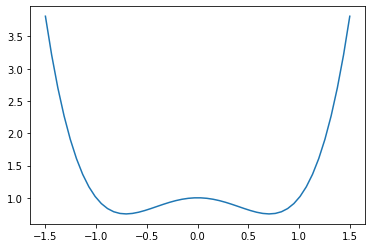

In [48]:
def cost_function_with_two_minima(x):
    return x ** 4 - x ** 2 + 1

x = np.linspace(-1.5, 1.5)
plt.plot(x, cost_function_with_two_minima(x));

In [49]:
# starting at -0.1 gives the left minimum
m = Minuit(cost_function_with_two_minima, x=-0.1)
m.migrad()
print("starting value -0.1, minimum at", m.values["x"])

# changing the starting value to 0.1 gives the right minimum
m.values["x"] = 0.1  # m.values[0] = 0.1 also works
m.migrad()
print("starting value +0.1, minimum at", m.values["x"])

starting value -0.1, minimum at -0.7085906080341975
starting value +0.1, minimum at 0.708796091342642
